In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
url = "https://raw.githubusercontent.com/SanjeevMakesh24/ds_assignment2/main/recruitment_data.csv"

In [ ]:
df = pd.read_csv(url)

In [ ]:
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [ ]:
#target variable - HiringDecision --> whether the candidate is hired or not

In [ ]:
df.shape

(1500, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [ ]:
df.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [ ]:
df.isnull().sum() #no null values

,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0
RecruitmentStrategy,0


In [ ]:
#checking which features might be most useful for building a model to classify
correlation_matrix = df.corr().round(2)['HiringDecision'].sort_values(ascending=False)

In [ ]:
correlation_matrix

,HiringDecision
HiringDecision,1.00
EducationLevel,0.24
SkillScore,0.20
PersonalityScore,0.17
InterviewScore,0.15
ExperienceYears,0.12
PreviousCompanies,0.04
Gender,-0.00
Age,0.00
DistanceFromCompany,-0.02


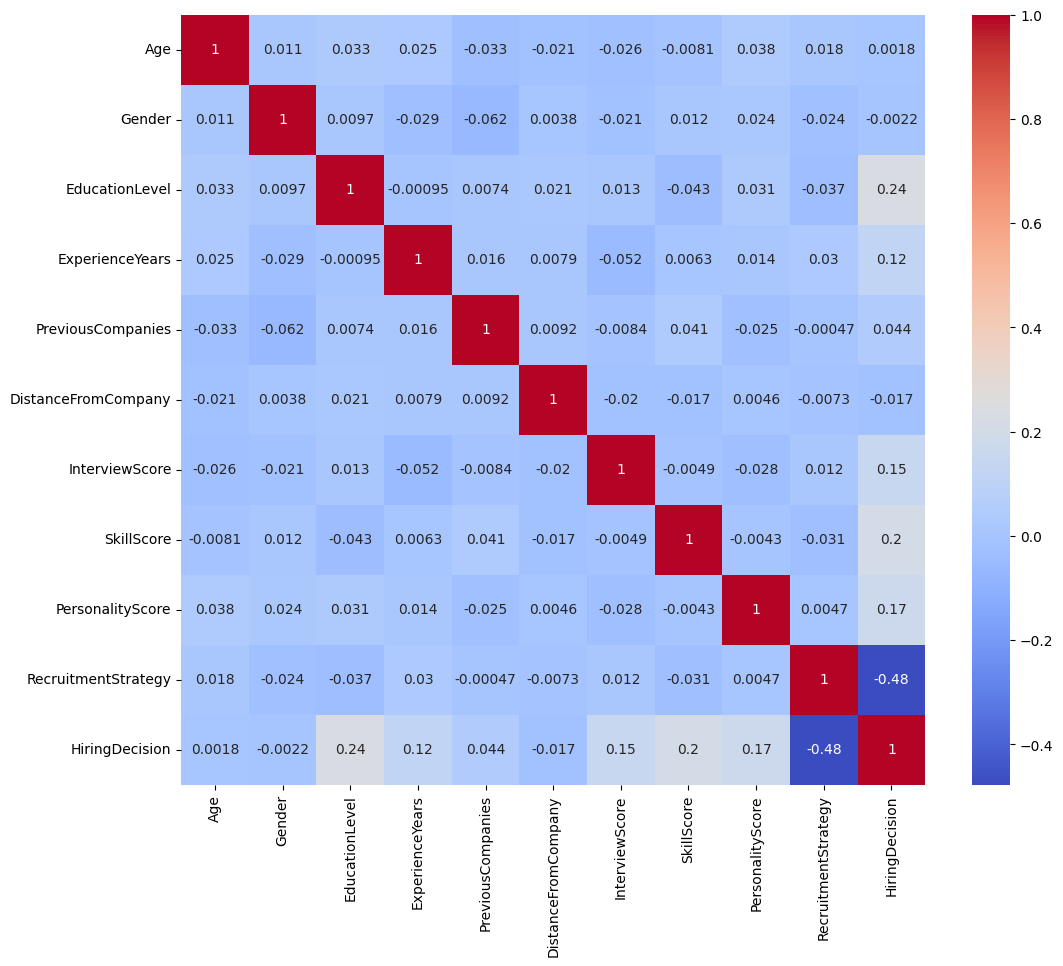

In [ ]:
#heatmap for correlation matrix (follow the last column)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
#since gender and age doesn't have any effect on the hiring decision - we can drop them
df = df.drop(['Gender', 'Age'], axis=1)

In [ ]:
df['HiringDecision'].value_counts()

,count
HiringDecision,
0,1035
1,465


In [ ]:
df.columns

Index(['EducationLevel', 'ExperienceYears', 'PreviousCompanies',
       'DistanceFromCompany', 'InterviewScore', 'SkillScore',
       'PersonalityScore', 'RecruitmentStrategy', 'HiringDecision'],
      dtype='object')

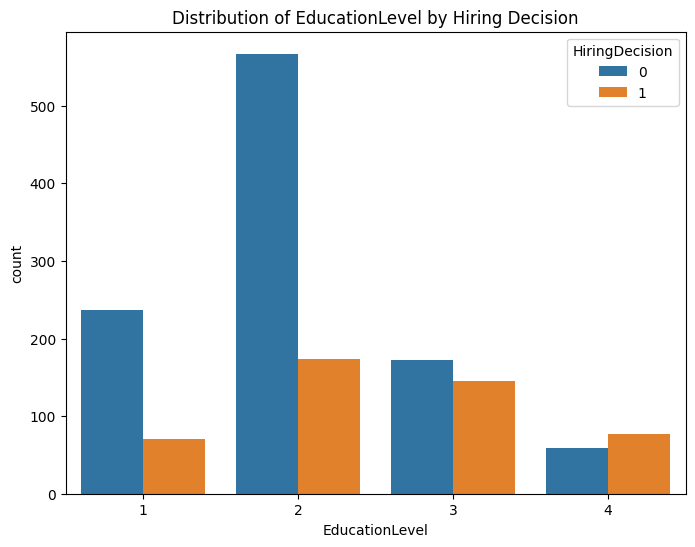

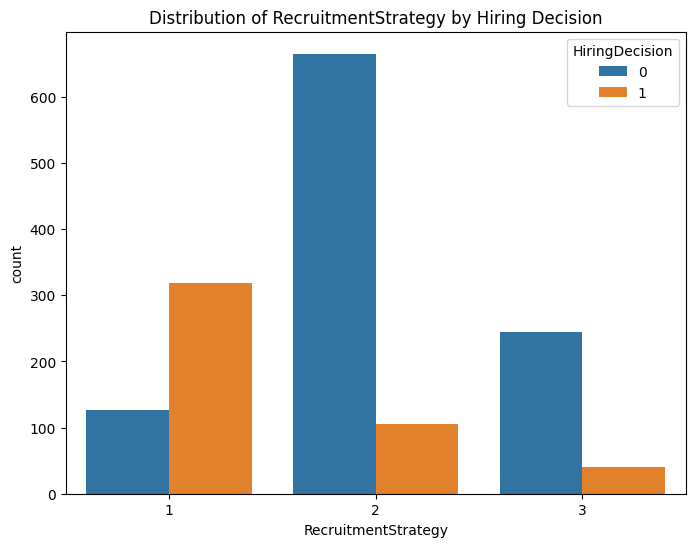

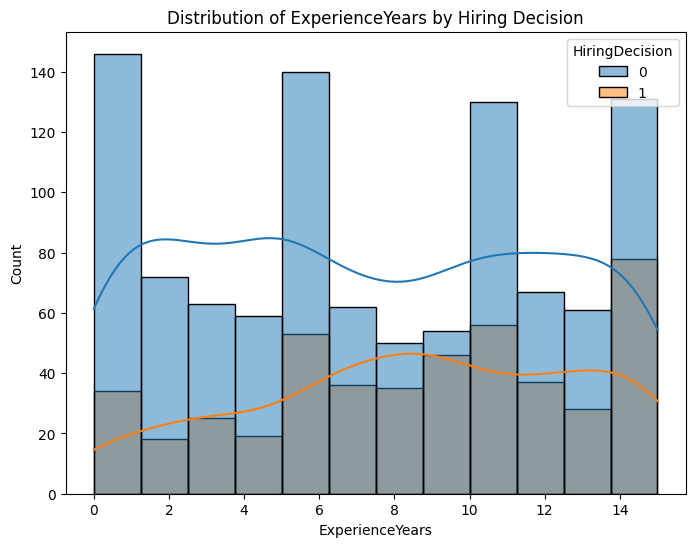

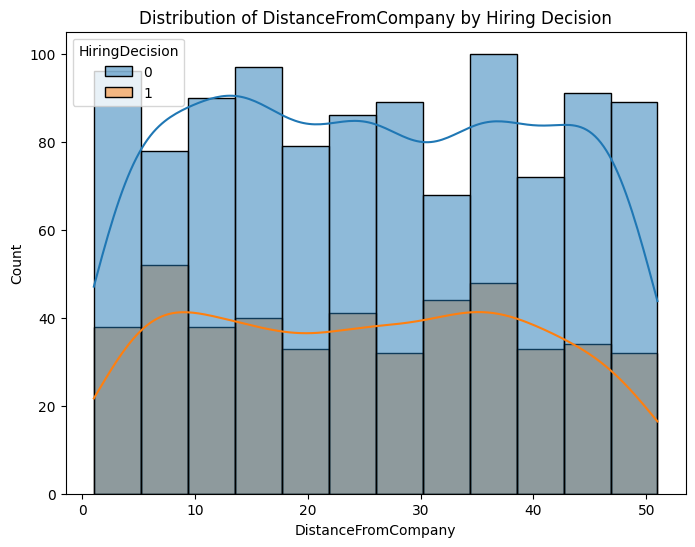

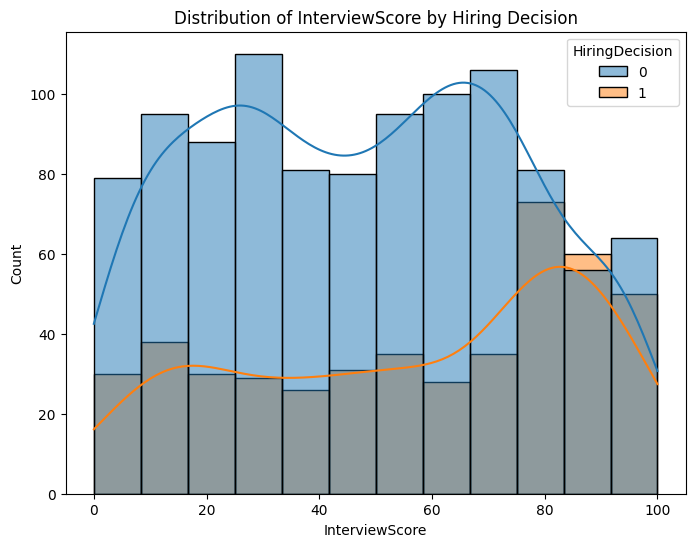

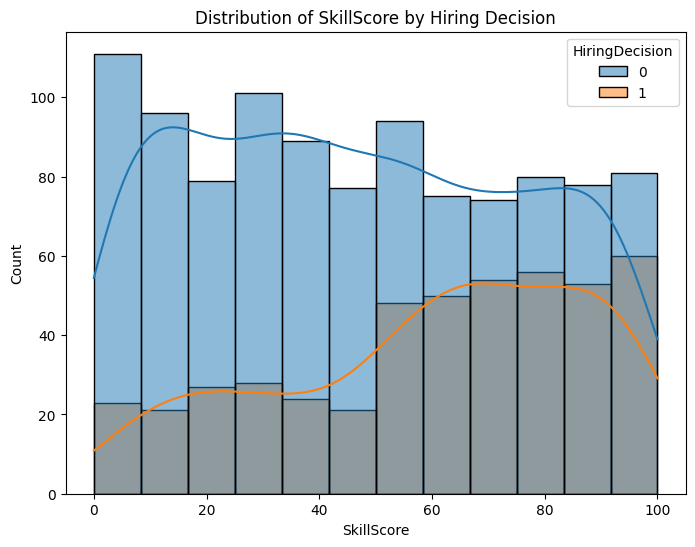

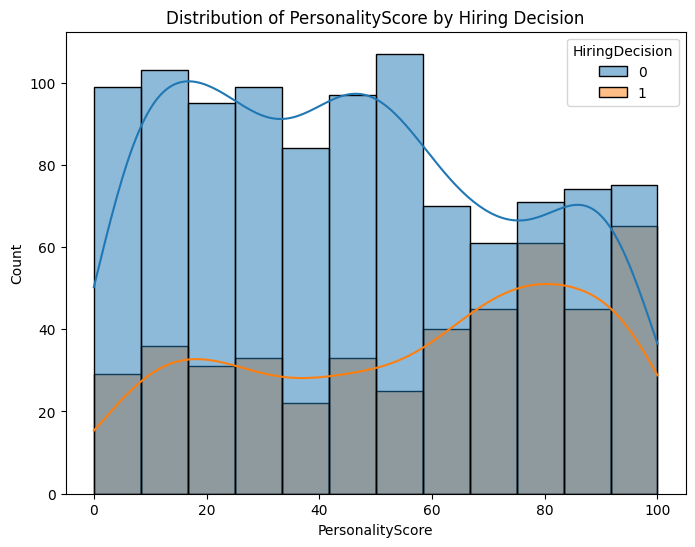

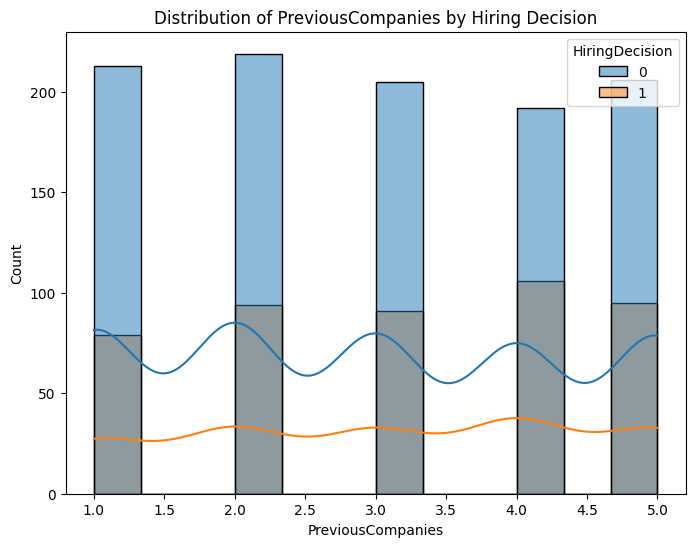

In [ ]:
#graphs for distribution of features
categorical_features = ['EducationLevel', 'RecruitmentStrategy']
numerical_features = ['ExperienceYears', 'DistanceFromCompany', 'InterviewScore', 'SkillScore', 'PersonalityScore', 'PreviousCompanies']

for col in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, hue='HiringDecision', data=df)
    plt.title(f'Distribution of {col} by Hiring Decision')
    plt.show()

for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(x=col, hue='HiringDecision', data=df, kde=True)
    plt.title(f'Distribution of {col} by Hiring Decision')
    plt.show()

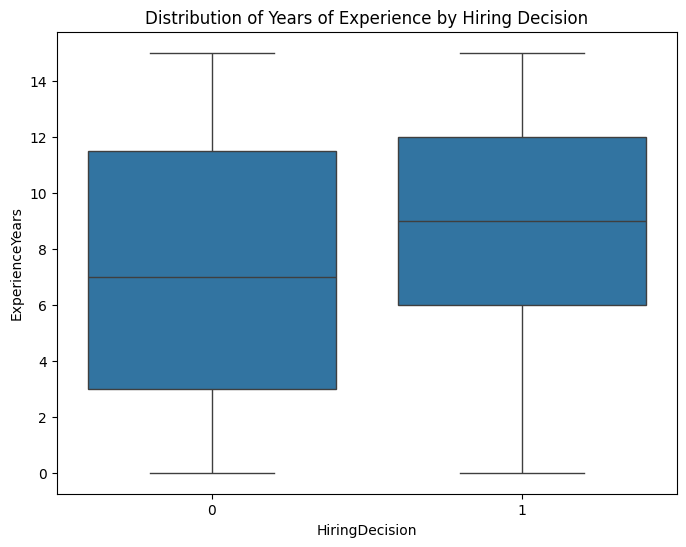

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HiringDecision', y='ExperienceYears', data=df)
plt.title('Distribution of Years of Experience by Hiring Decision')
plt.show()
#we can see that who were hired had more years of experience on average

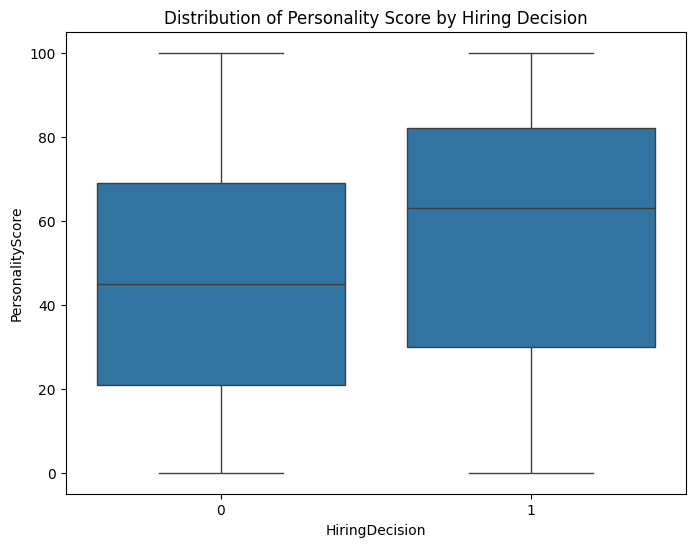

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HiringDecision', y='PersonalityScore', data=df)
plt.title('Distribution of Personality Score by Hiring Decision')
plt.show()
#people who were hired had a higher personality score on average

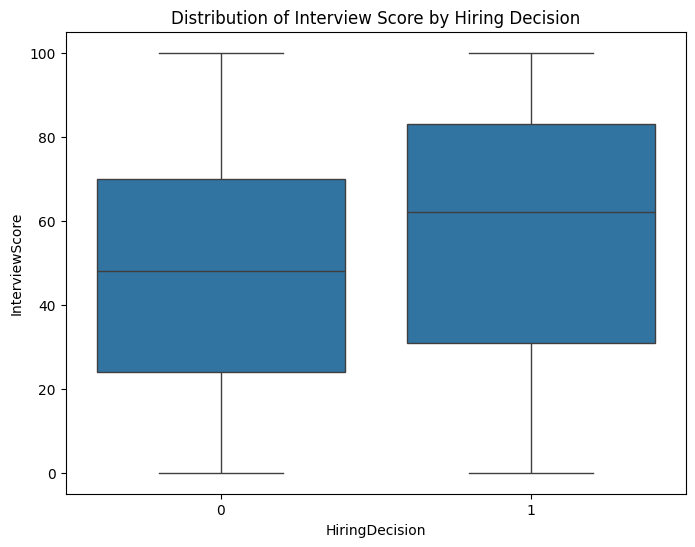

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HiringDecision', y='InterviewScore', data=df)
plt.title('Distribution of Interview Score by Hiring Decision')
plt.show()
#people who were hired had a higher interview score on average

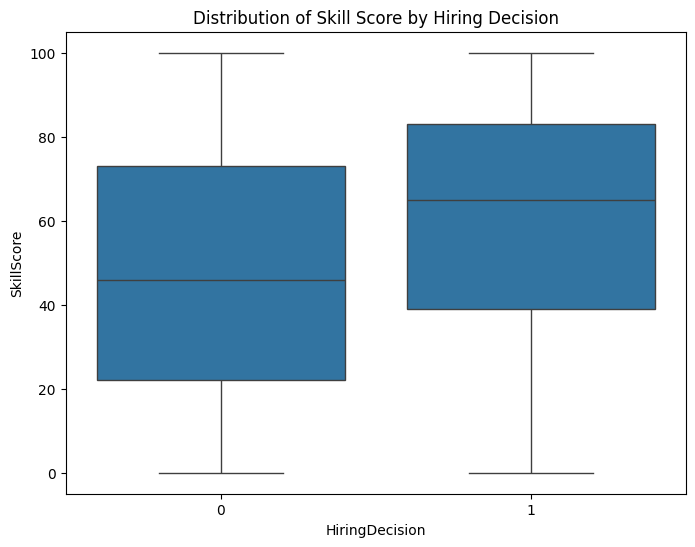

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HiringDecision', y='SkillScore', data=df)
plt.title('Distribution of Skill Score by Hiring Decision')
plt.show()
#people who were hired had a skill interview score on average
#most hired candidates scored higher, and their scores are more concentrated in the upper range
#both groups have candidates from 0 → 100, so SkillScore alone doesn’t guarantee hiring.

In [ ]:
df.head()

,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,2,0,3,26.783828,48,78,91,1,1
1,4,12,3,25.862694,35,68,80,2,1
2,2,3,2,9.920805,20,67,13,2,0
3,2,5,2,6.407751,36,27,70,3,0
4,1,6,1,43.105343,23,52,85,2,0


In [ ]:
'''
since tree-based models are scale-invariant, we don't have to standardize the data
'''

"\nsince tree-based models are scale-invariant, we don't have to standardize the data\n"

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
#train test split
X = df.drop('HiringDecision', axis=1)
y = df['HiringDecision']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1200, 8), (300, 8))

In [ ]:
y_train.shape, y_test.shape

((1200,), (300,))

# **Decision Tree Classifier**

In [ ]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 3, 5, 7, 9, 12],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced']  #for class imbalance - which we have because more than twice as much were not hired
}

In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
gs1 = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1, #use all processors
    verbose=0
)


gs1.fit(X_train, y_train) #runs the entire grid search process

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 3, 5, 7, 9, 12],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1')

In [ ]:
gs1.best_params_ #best parameters

{'class_weight': 'balanced',
 'criterion': 'log_loss',
 'max_depth': 7,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [ ]:
gs1.best_score_ #best score - f1 score

np.float64(0.8546159586846749)

In [ ]:
best_dt = gs1.best_estimator_ #extracts the best trained model from the grid search object.

In [ ]:
y_pred = best_dt.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

In [ ]:
print("Test Accuracy :", accuracy_score(y_test, y_pred))

Test Accuracy : 0.9233333333333333


In [ ]:
print("\nClassification report:\n", classification_report(y_test, y_pred, digits=3))


Classification report:
               precision    recall  f1-score   support

           0      0.944     0.949     0.947       215
           1      0.869     0.859     0.864        85

    accuracy                          0.923       300
   macro avg      0.907     0.904     0.905       300
weighted avg      0.923     0.923     0.923       300



array([[204,  11],
       [ 12,  73]])

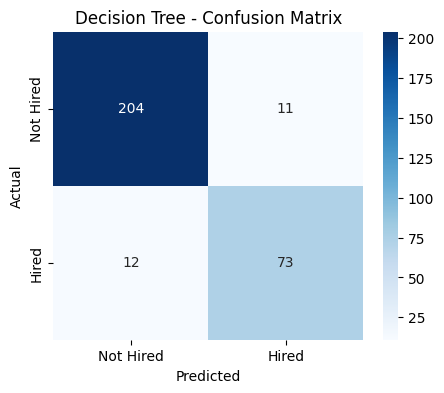

In [ ]:
#confusion matrix for DT
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree - Confusion Matrix')
#plt.show()
cm

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

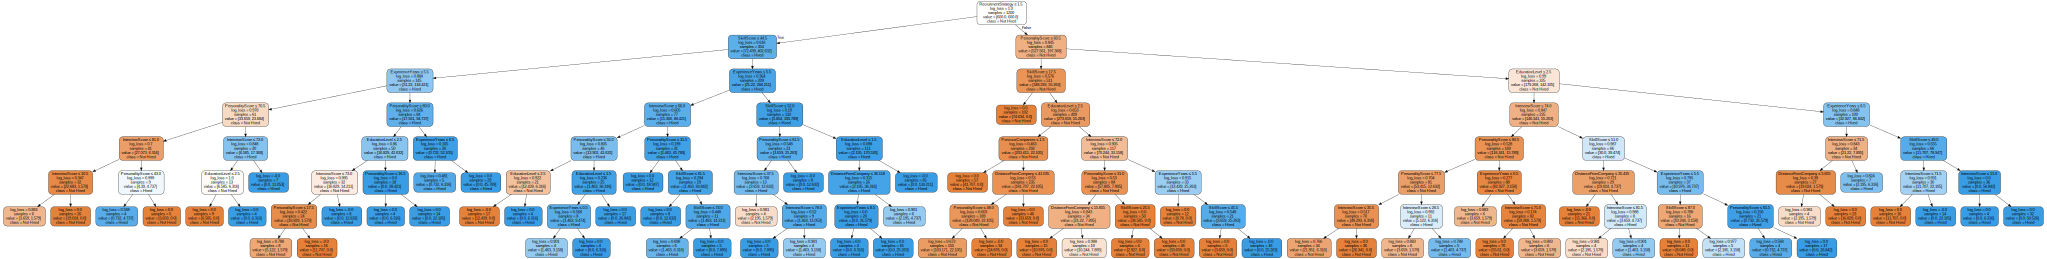

In [ ]:
#tree visualization in Graphviz format
dot_data = export_graphviz(
    best_dt,
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Hired', 'Hired'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph

In [ ]:
y_proba = best_dt.predict_proba(X_test)[:, 1]  # returns the predicted probabilities for each class - but we are only getting hired for ROC

In [ ]:
y_proba[1]

np.float64(0.30147058823529416)

In [ ]:
#ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

ROC AUC: 0.8911354309165527


In [ ]:
'''
ROC AUC score of 0.891, indicates that the model performs very well in distinguishing between hired and
not-hired candidates across different probability thresholds.

The ROC curve is built by sweeping through all possible thresholds (0 → 1) for separating TPR and FPR.
Plotting TPR vs FPR for all thresholds gives the ROC curve
'''

'\nROC AUC score of 0.891, indicates that the model performs very well in distinguishing between hired and\nnot-hired candidates across different probability thresholds.\n\nThe ROC curve is built by sweeping through all possible thresholds (0 → 1) for separating TPR and FPR.\nPlotting TPR vs FPR for all thresholds gives the ROC curve\n'

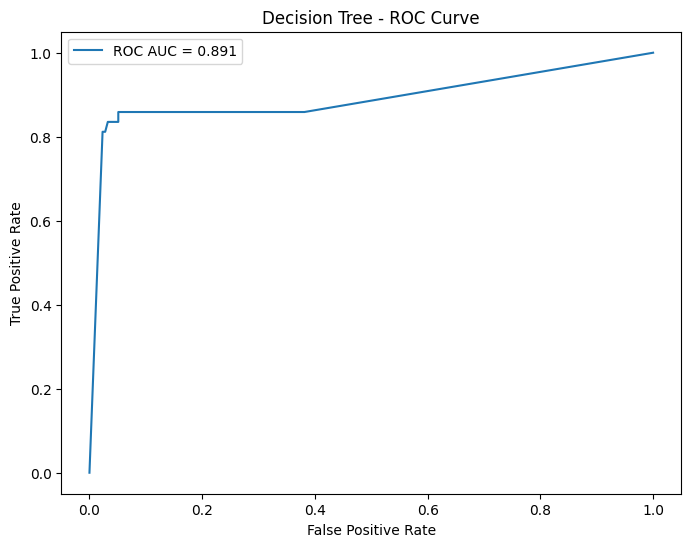

In [ ]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree - ROC Curve')
plt.legend()
plt.show()

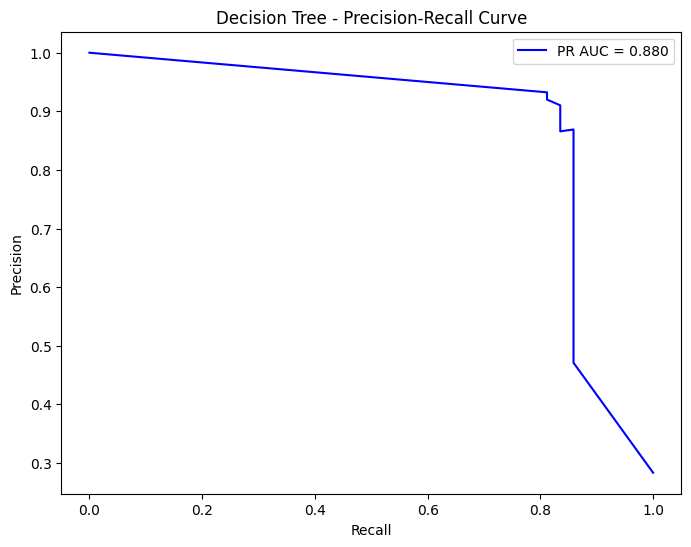

In [ ]:
#precision recall curve for decision tree
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, color='blue', label=f'PR AUC = {pr_auc:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Decision Tree - Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
#feature importance for DT
feature_importance_dt = best_dt.feature_importances_
features = X.columns
#sort features by importance
indices = np.argsort(feature_importance_dt)[::-1]

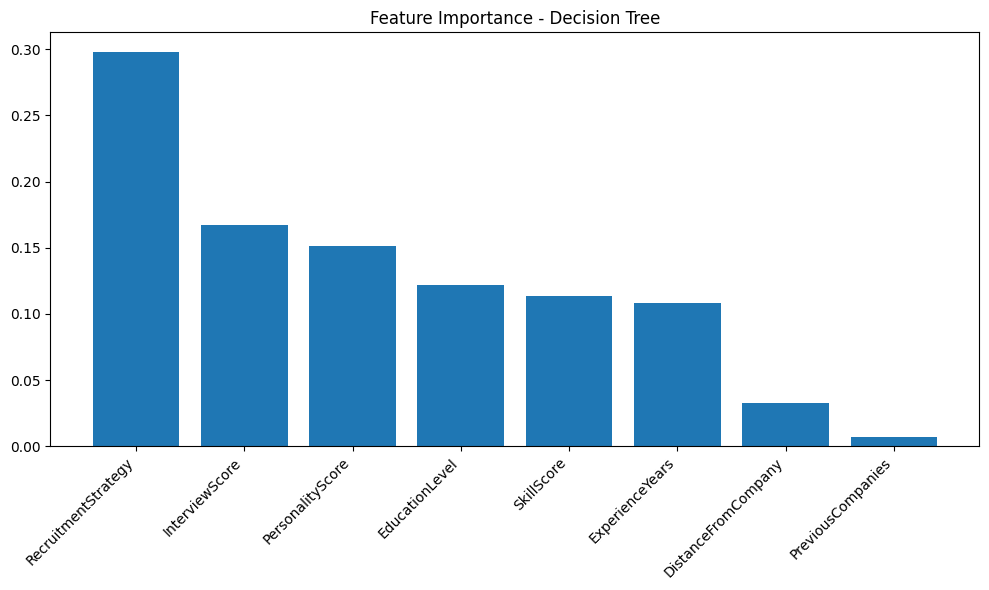

In [ ]:
#plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Decision Tree')
plt.bar(range(len(feature_importance_dt)), feature_importance_dt[indices])
plt.xticks(range(len(feature_importance_dt)), [features[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Random Forest Classifier**

In [ ]:
rf = RandomForestClassifier(random_state=42)

In [ ]:
param_grid = {
    'n_estimators': [100, 300, 600], #number of trees
    'max_depth': [None, 5, 8, 12], #to control overfitting
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True],
    'class_weight': ['balanced']
    }

In [ ]:
gs_rf = GridSearchCV(
    rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'class_weight': ['balanced'],
                         'max_depth': [None, 5, 8, 12],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 300, 600]},
             scoring='f1')

In [ ]:
gs_rf.best_params_

{'bootstrap': True,
 'class_weight': 'balanced',
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [ ]:
print("RF best CV F1:", gs_rf.best_score_)

RF best CV F1: 0.8853880182424942


In [ ]:
best_rf = gs_rf.best_estimator_

In [ ]:
y_pred_rf = best_rf.predict(X_test)
y_proba_rf = best_rf.predict_proba(X_test)[:, 1]

In [ ]:
print("RF Test Accuracy:", accuracy_score(y_test, y_pred_rf))

RF Test Accuracy: 0.9366666666666666


In [ ]:
print("\nRF Classification report:\n", classification_report(y_test, y_pred_rf, digits=3))


RF Classification report:
               precision    recall  f1-score   support

           0      0.950     0.963     0.956       215
           1      0.902     0.871     0.886        85

    accuracy                          0.937       300
   macro avg      0.926     0.917     0.921       300
weighted avg      0.936     0.937     0.936       300



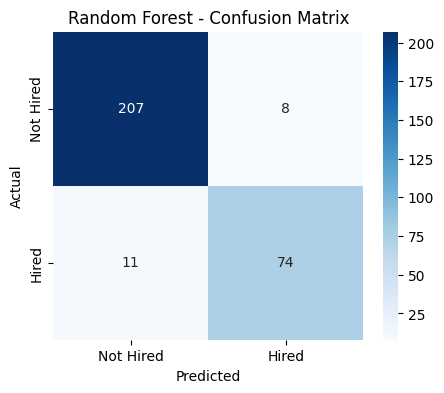

In [ ]:
#confusion matrix for RF
#confusion matrix for DT
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest - Confusion Matrix')
plt.show()

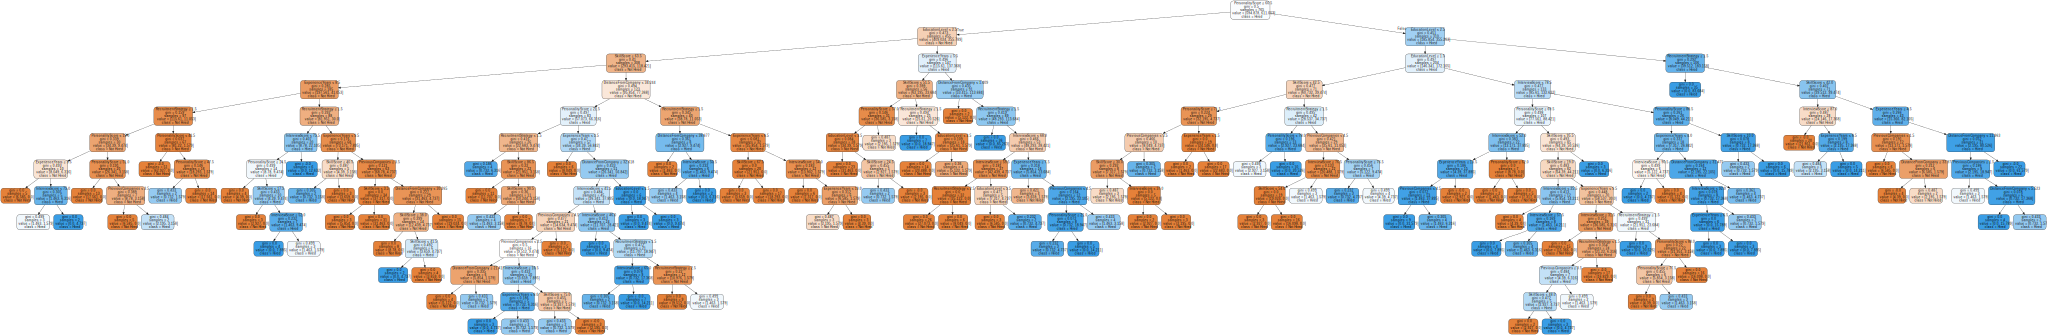

In [ ]:
#visualize first tree from the forest
dot_data_rf = export_graphviz(
    best_rf.estimators_[0],  #first tree in the forest
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Hired', 'Hired'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph_rf = graphviz.Source(dot_data_rf)
graph_rf

In [ ]:
#ROC for RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)
print("RF ROC AUC:", roc_auc_rf)

RF ROC AUC: 0.9314363885088919


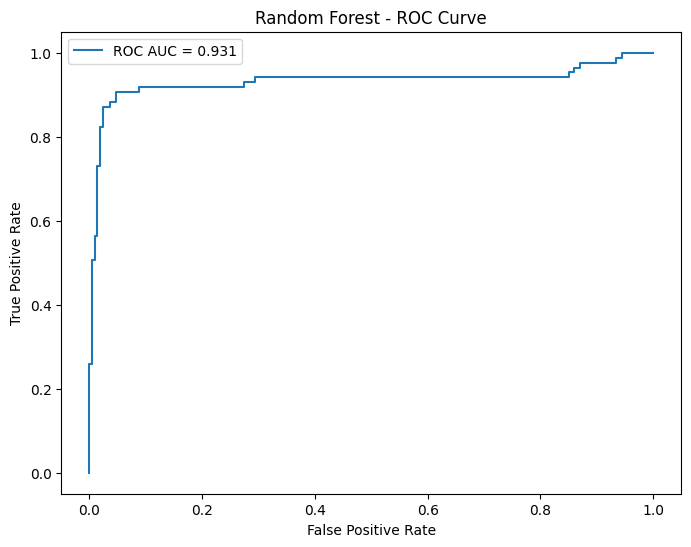

In [ ]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'ROC AUC = {roc_auc_rf:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

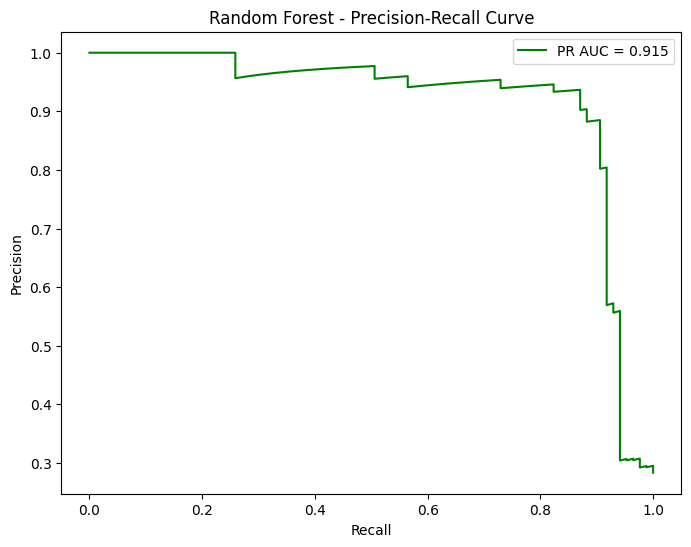

In [ ]:
#precision recall curve for Random Forest
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_proba_rf)
pr_auc_rf = auc(recall_rf, precision_rf)

plt.figure(figsize=(8,6))
plt.plot(recall_rf, precision_rf, label=f'PR AUC = {pr_auc_rf:.3f}', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest - Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
#feature importance for RF
feature_importance_rf = best_rf.feature_importances_
features = X.columns
#sort features by importance
indices = np.argsort(feature_importance_rf)[::-1]

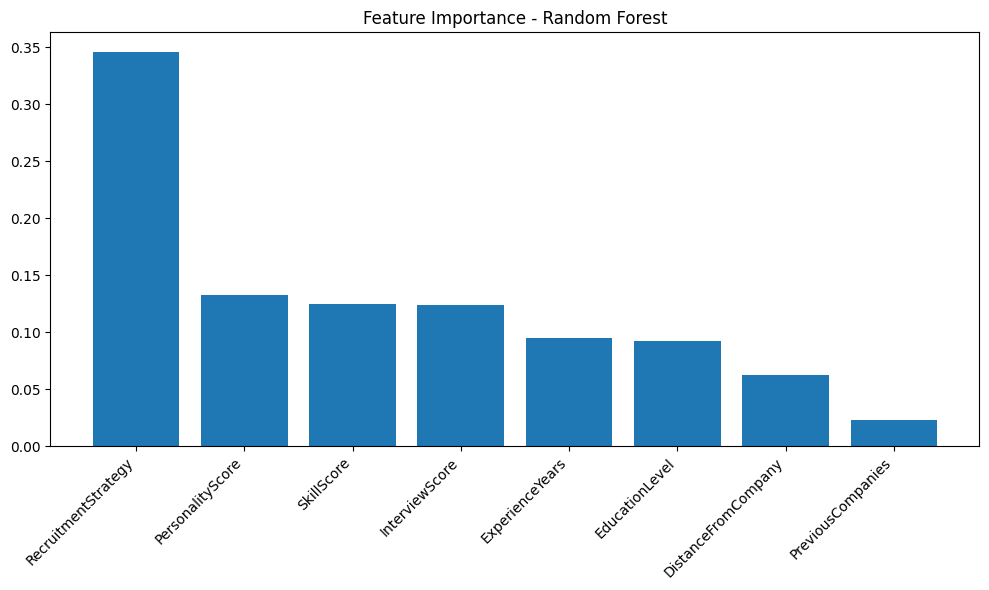

In [ ]:
#plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - Random Forest')
plt.bar(range(len(feature_importance_rf)), feature_importance_rf[indices])
plt.xticks(range(len(feature_importance_rf)), [features[i] for i in indices], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **AdaBoost Classifier**

In [ ]:
#decision stump
base_estimator = DecisionTreeClassifier(max_depth=1)

In [ ]:
#using samme for multi class
ada = AdaBoostClassifier(estimator=base_estimator, random_state=42, algorithm='SAMME')

In [ ]:
param_grid_ada = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

In [ ]:
gs_ada = GridSearchCV(
    ada,
    param_grid=param_grid_ada,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs_ada.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200, 300]},
             scoring='f1')

In [ ]:
gs_ada.best_params_

{'learning_rate': 1.0, 'n_estimators': 100}

In [ ]:
print("AdaBoost best CV F1:", gs_ada.best_score_)

AdaBoost best CV F1: 0.866918007197809


In [ ]:
best_ada = gs_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test)
y_proba_ada = best_ada.predict_proba(X_test)[:, 1]

In [ ]:
print("AdaBoost Test Accuracy:", accuracy_score(y_test, y_pred_ada))

AdaBoost Test Accuracy: 0.9466666666666667


In [ ]:
print("\nAdaBoost Classification report:\n", classification_report(y_test, y_pred_ada, digits=3))


AdaBoost Classification report:
               precision    recall  f1-score   support

           0      0.959     0.967     0.963       215
           1      0.916     0.894     0.905        85

    accuracy                          0.947       300
   macro avg      0.937     0.931     0.934       300
weighted avg      0.946     0.947     0.946       300



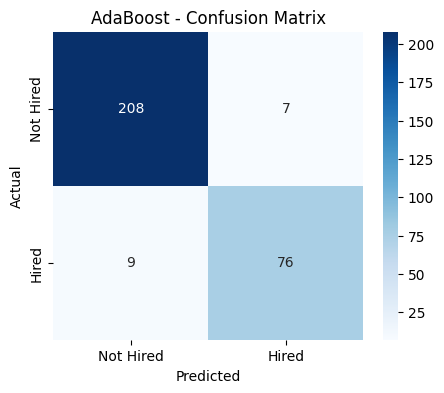

In [ ]:
#confusion matrix for AdaBoost
cm = confusion_matrix(y_test, y_pred_ada)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('AdaBoost - Confusion Matrix')
plt.show()

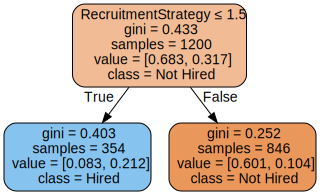

In [ ]:
#tree visualization for one estimator from AdaBoost
dot_data_ada = export_graphviz(
    best_ada.estimators_[0],  #first weak learner
    out_file=None,
    feature_names=X.columns,
    class_names=['Not Hired', 'Hired'],
    filled=True,
    rounded=True,
    special_characters=True
)

graph_ada = graphviz.Source(dot_data_ada)
graph_ada

In [ ]:
#ROC for AdaBoost
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_proba_ada)
roc_auc_ada = auc(fpr_ada, tpr_ada)
print("AdaBoost ROC AUC:", roc_auc_ada)

AdaBoost ROC AUC: 0.929876880984952


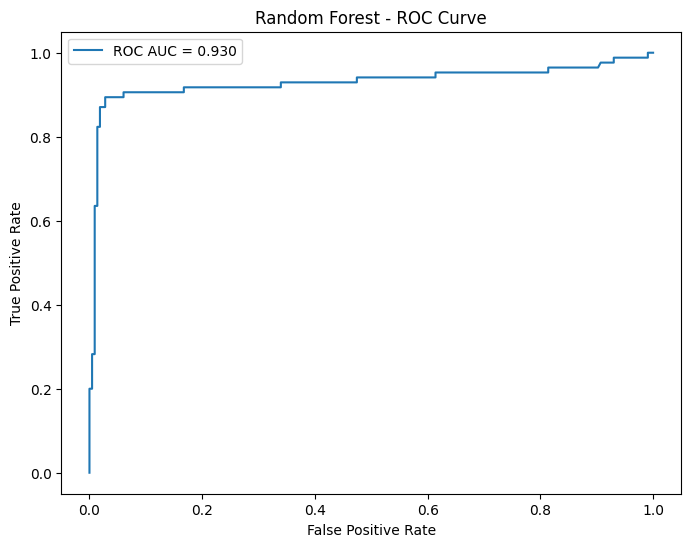

In [ ]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_ada, tpr_ada, label=f'ROC AUC = {roc_auc_ada:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest - ROC Curve')
plt.legend()
plt.show()

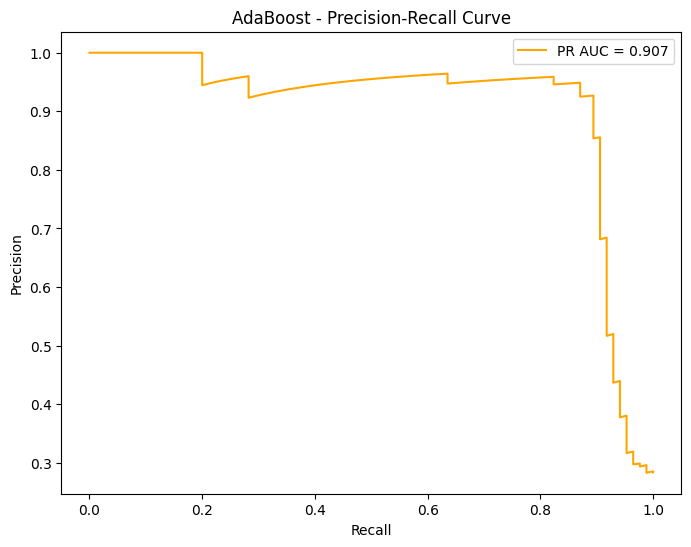

In [ ]:
#precision recall curve for AdaBoost
precision_ada, recall_ada, _ = precision_recall_curve(y_test, y_proba_ada)
pr_auc_ada = auc(recall_ada, precision_ada)

plt.figure(figsize=(8,6))
plt.plot(recall_ada, precision_ada, label=f'PR AUC = {pr_auc_ada:.3f}', color='orange')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('AdaBoost - Precision-Recall Curve')
plt.legend()
plt.show()


In [ ]:
#feature importance for AdaBoost
feature_importance_ada = best_ada.feature_importances_
#sort features by importance
indices_ada = np.argsort(feature_importance_ada)[::-1]

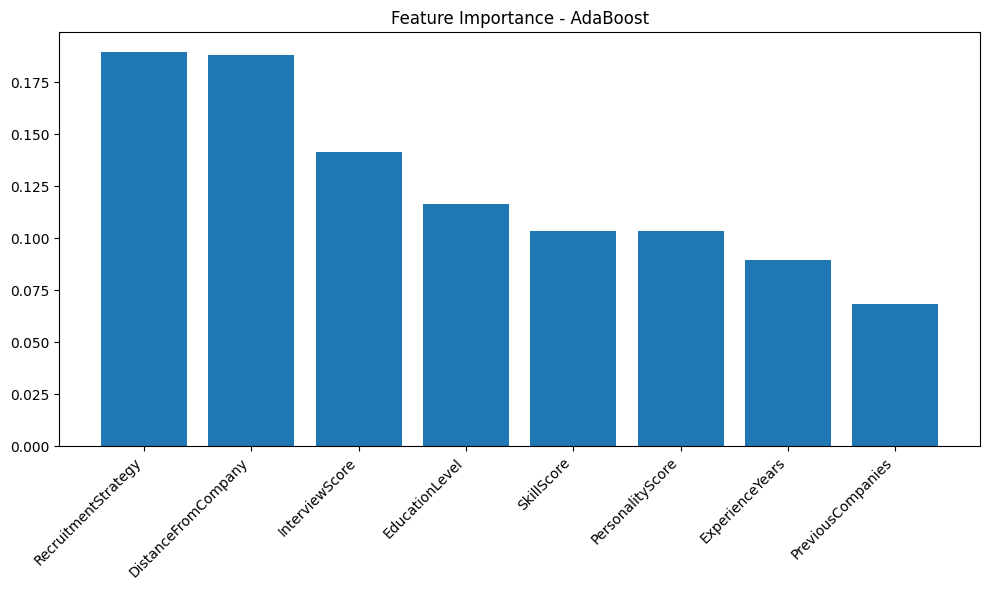

In [ ]:
#plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - AdaBoost')
plt.bar(range(len(feature_importance_ada)), feature_importance_ada[indices_ada])
plt.xticks(range(len(feature_importance_ada)), [features[i] for i in indices_ada], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **XGBoost Classifier**

In [ ]:
xgb = XGBClassifier(random_state=42, eval_metric='logloss')

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5]
}

In [ ]:
gs_xgb = GridSearchCV(
    xgb,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0, 0.1, 0.2],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='f1')

In [ ]:
gs_xgb.best_params_

{'colsample_bytree': 1.0,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 0.8}

In [ ]:
print("XGBoost best CV F1:", gs_xgb.best_score_)

XGBoost best CV F1: 0.8933527247133541


In [ ]:
best_xgb = gs_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]

In [ ]:
print("XGBoost Test Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nXGBoost Classification report:\n", classification_report(y_test, y_pred_xgb, digits=3))

XGBoost Test Accuracy: 0.93

XGBoost Classification report:
               precision    recall  f1-score   support

           0      0.941     0.963     0.952       215
           1      0.900     0.847     0.873        85

    accuracy                          0.930       300
   macro avg      0.920     0.905     0.912       300
weighted avg      0.929     0.930     0.929       300



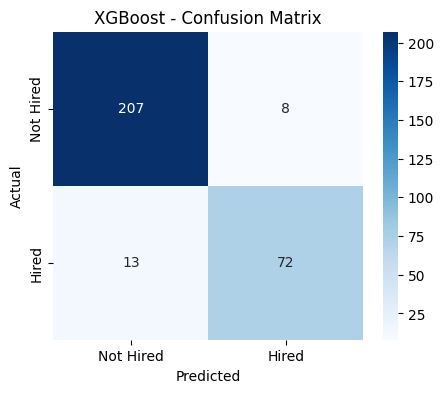

In [ ]:
#confusion matrix for XGBoost
cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Hired', 'Hired'], yticklabels=['Not Hired', 'Hired'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost - Confusion Matrix')
plt.show()

/usr/local/lib/python3.12/dist-packages/xgboost/plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


<Figure size 2000x1000 with 0 Axes>

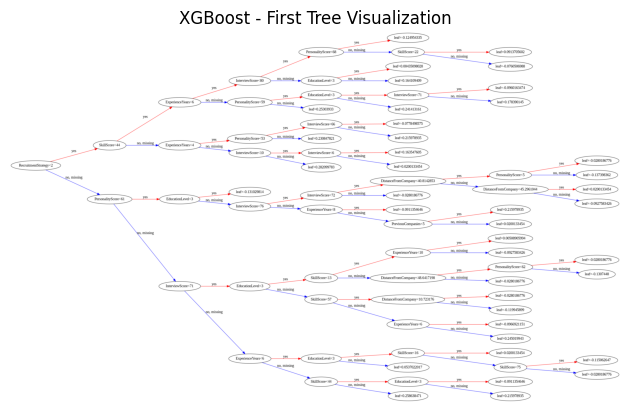

In [ ]:
#plot XGB first tree
from xgboost import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(best_xgb, num_trees=0, rankdir='LR')
plt.title('XGBoost - First Tree Visualization')
plt.tight_layout()
plt.show()

In [ ]:
#ROC for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)
print("XGBoost ROC AUC:", roc_auc_xgb)

XGBoost ROC AUC: 0.9237209302325582


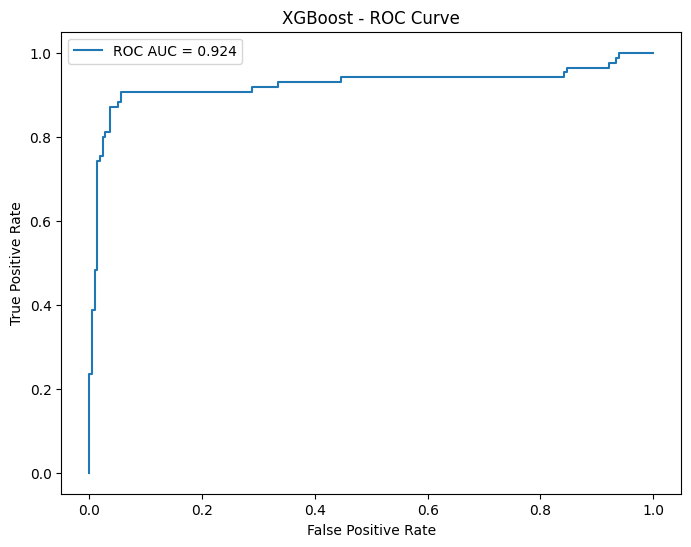

In [ ]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr_xgb, tpr_xgb, label=f'ROC AUC = {roc_auc_xgb:.3f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost - ROC Curve')
plt.legend()
plt.show()

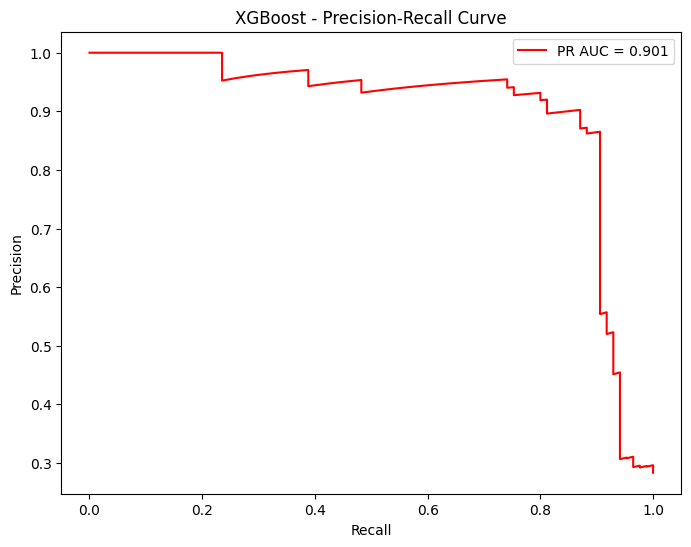

In [ ]:
#precision recall curve for XGBoost
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)

plt.figure(figsize=(8,6))
plt.plot(recall_xgb, precision_xgb, label=f'PR AUC = {pr_auc_xgb:.3f}', color='red')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('XGBoost - Precision-Recall Curve')
plt.legend()
plt.show()

In [ ]:
#feature importance for XGBoost
feature_importance_xgb = best_xgb.feature_importances_
#sort features by importance
indices_xgb = np.argsort(feature_importance_xgb)[::-1]

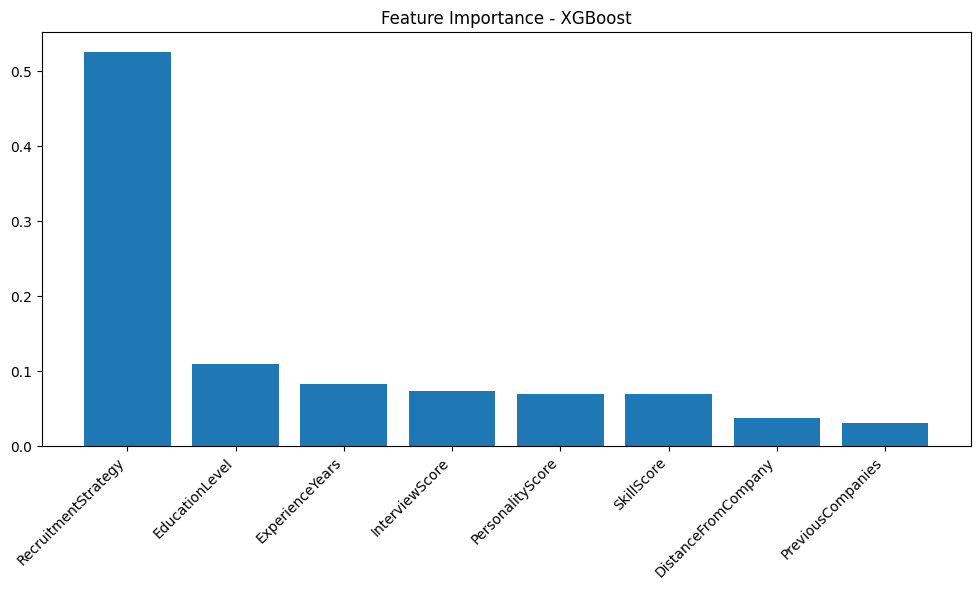

In [ ]:
#plot feature importance
plt.figure(figsize=(10, 6))
plt.title('Feature Importance - XGBoost')
plt.bar(range(len(feature_importance_xgb)), feature_importance_xgb[indices_xgb])
plt.xticks(range(len(feature_importance_xgb)), [features[i] for i in indices_xgb], rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Model Comparison**

In [ ]:
from sklearn.metrics import f1_score

results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_ada),
        accuracy_score(y_test, y_pred_xgb)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_ada),
        f1_score(y_test, y_pred_xgb)
    ],
    'ROC AUC': [
        roc_auc,
        roc_auc_rf,
        roc_auc_ada,
        roc_auc_xgb
    ]
})

results.sort_values(by='F1 Score', ascending=False, inplace=True)
display(results)


,Model,Accuracy,F1 Score,ROC AUC
2,AdaBoost,0.946667,0.904762,0.929877
1,Random Forest,0.936667,0.886228,0.931436
3,XGBoost,0.930000,0.872727,0.923721
0,Decision Tree,0.923333,0.863905,0.891135
